# Lab 1 Data Notebook

## Importing all the packages & tools needed

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal
from scipy.signal import correlate, correlation_lags

## Importing data from 4 Nyquist Zones

In [5]:
# Data at a constant sample rate 1.0e6 Hz and constant amplitude 2.5 mV for Nyquist zone 0 and amplitude ____ for Nyquist zones 1-3


# ———————————————————— Nyquist Zone 0 ————————————————————
with np.load("Z0_150kHz.npz") as data:
    # print(data.files)
    Z0_150 = data['arr_0']
    # print(Z0_150)
    
with np.load("Z0_250kHz.npz") as data:
    # print(data.files)
    Z0_250 = data['arr_0']
    # print(Z0_250)

with np.load("Z0_350kHz.npz") as data:
    # print(data.files)
    Z0_350 = data['arr_0']
    # print(Z0_350)


# ———————————————————— Nyquist Zone 1 ————————————————————
with np.load("Z1_650kHz.npz") as data:
    # print(data.files)
    Z1_650 = data['arr_0']
    # print(Z1_650)
    
with np.load("Z1_750kHz.npz") as data:
    # print(data.files)
    Z1_750 = data['arr_0']
    # print(Z1_750)

with np.load("Z1_850kHz.npz") as data:
    # print(data.files)
    Z1_850 = data['arr_0']
    # print(Z1_850)


# ———————————————————— Nyquist Zone 2 ————————————————————
with np.load("Z2_1150kHz.npz") as data:
    # print(data.files)
    Z2_1150 = data['arr_0']
    # print(Z2_1150)
    
with np.load("Z2_1250kHz.npz") as data:
    # print(data.files)
    Z2_1250 = data['arr_0']
    # print(Z2_1250)

with np.load("Z2_1350kHz.npz") as data:
    # print(data.files)
    Z2_1350 = data['arr_0']
    # print(Z2_1350)


# ———————————————————— Nyquist Zone 3 ————————————————————
with np.load("Z3_1650kHz.npz") as data:
    # print(data.files)
    Z3_1650 = data['arr_0']
    # print(Z3_1650)
    
with np.load("Z3_1750kHz.npz") as data:
    # print(data.files)
    Z3_1750 = data['arr_0']
    # print(Z3_1750)

with np.load("Z3_1850kHz.npz") as data:
    # print(data.files)
    Z3_1850 = data['arr_0']
    # print(Z3_1850)

## 5.3.1 Digital Sampling and the Nyquist Criterion

### Amplitude vs. Sampling Rate
The first data collected are the amplitude vs. sampling rate plots below. They are organized by Nyquist Zones, with zone 0 ranging from 0 kHz to 500 kHz; zone 1 ranging from 500 kHz to 1000 kHz; zone 2 ranging from 1000 kHz to 1500 kHz; and zone 3 ranging from 1500 kHz to 2000 kHz.

While cool, this data is not in the correct units, since what is a sampling rate? Instead, we want to calculate this in units of Amplitude vs. Time (in milliseconds), which, of course, can be found in the next cell below!

### Creating a figure on what Nyquist zones we are studying and what it should look like!

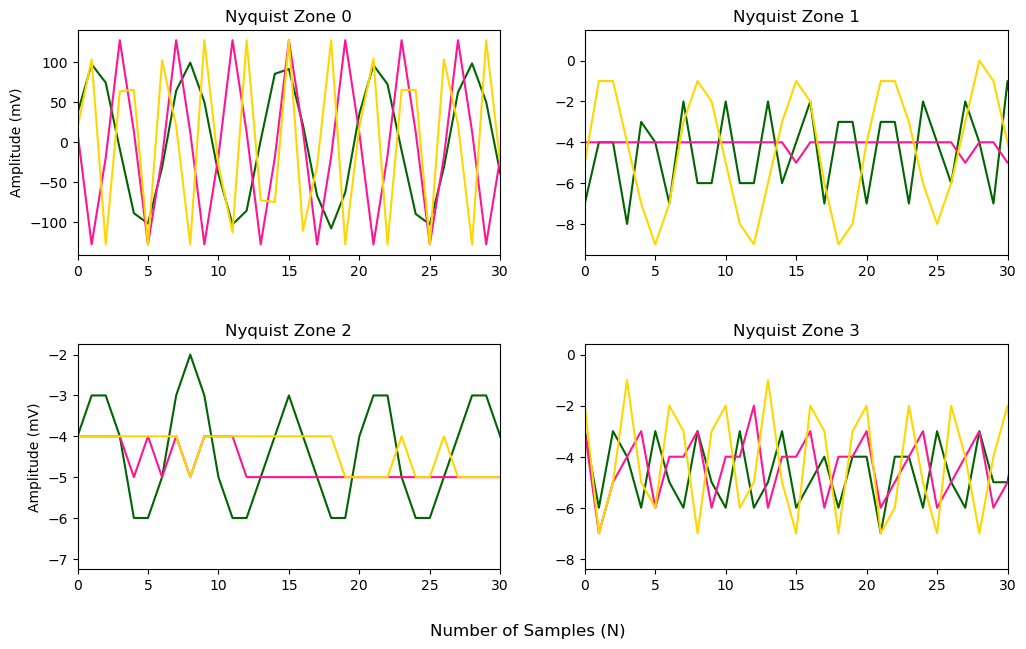

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=False, sharex=False)

# ———————————————————— TOP ROW: Amplitude vs Samples ————————————————————
# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(Z0_150[1], color='darkgreen') # label="Zone 0, Freq = 150kHz")
ax.plot(Z0_250[1], color='deeppink') # label="Zone 0, Freq = 250kHz")
ax.plot(Z0_350[1], color='gold') # label="Zone 0, Freq = 350kHz")
ax.set_ylabel('Amplitude (mV)')
ax.set_title('Nyquist Zone 0')
# ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(Z1_650[1], color='darkgreen') # label="Zone 1, Freq = 650 kHz")
ax.plot(Z1_750[1], color='deeppink') # label="Zone 1, Freq = 750 kHz")
ax.plot(Z1_850[1], color='gold') # label="Zone 1, Freq = 850 kHz")
# ax.set_ylabel('Amplitude (mV)')
ax.set_title('Nyquist Zone 1')
# ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]
ax.plot(Z2_1150[1], color='darkgreen') # label="Zone 2, Freq = 1150 kHz")
ax.plot(Z2_1250[1], color='deeppink') # label="Zone 2, Freq = 1250 kHz")
ax.plot(Z2_1350[1], color='gold') # label="Zone 2, Freq = 1350 kHz")
ax.set_ylabel('Amplitude (mV)')
ax.set_title('Nyquist Zone 2')
# ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]
ax.plot(Z3_1650[1], color='darkgreen') # label="Zone 3, Freq = 1650 kHz")
ax.plot(Z3_1750[1], color='deeppink') # label="Zone 3, Freq = 1750 kHz")
ax.plot(Z3_1850[1], color='gold') # label="Zone 3, Freq = 1850 kHz")
# ax.set_ylabel('Amplitude (mV)')
ax.set_title('Nyquist Zone 3')
# ax.legend()
# ax.show()

# Zoom x-axis to first 30 samples for all subplots
for ax in axes.flat:
    ax.set_xlim(0, 30)

# Put legends OUTSIDE for top row
# for ax in axes[0, :]:
#     ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0), borderaxespad=0., fontsize=9, framealpha=0.95)

fig.supxlabel('Number of Samples (N)')
fig.subplots_adjust(hspace=0.4)
# plt.tight_layout(rect=[0, 0.05, 1, 1])

### Some notes on the data above
Wow, look at all those colors! In order to be consistent and readable, each plot uses the same three colors over and over. Darkreen represents the lowest measured frequency of each Nyquist Zone (150 kHz, 650 kHz, 1150 kHz, 1650 kHz), pink represents the middle measured frequency of each zone (250 kHz, 750 kHz, 1250 kHz, 1750 kHz), and gold represents the highest measured frequency of each zone (350 kHz, 850 kHz, 1350 kHz, 1850 kHz), respectively.

Another note, what is going on with the amplitude? Ie, why is the amplitude in zone 0 centered around zero and really high, while the others are negative and much lower? Well, you see, each SDR has internal anti-aliasing filters, which — you guessed it — prevent aliasing! Thus, higher frequencies have a smaller frequency.

### Amplitude vs. Time
Ah yes, now we are in the correct units! We are looking at a tenth of a millisecond, which is EXTREMELY small — so keep that in mind. This thing is moving reallyyyyy fast.

To go from sampling rate to time, we divided the length of each data array by the sample rate (1.0e6 kHz), before being multiplied by 1000 to convert it to milliseconds. Otherwise, the data is the same, but now we have a concept of how quickly the data is moving!

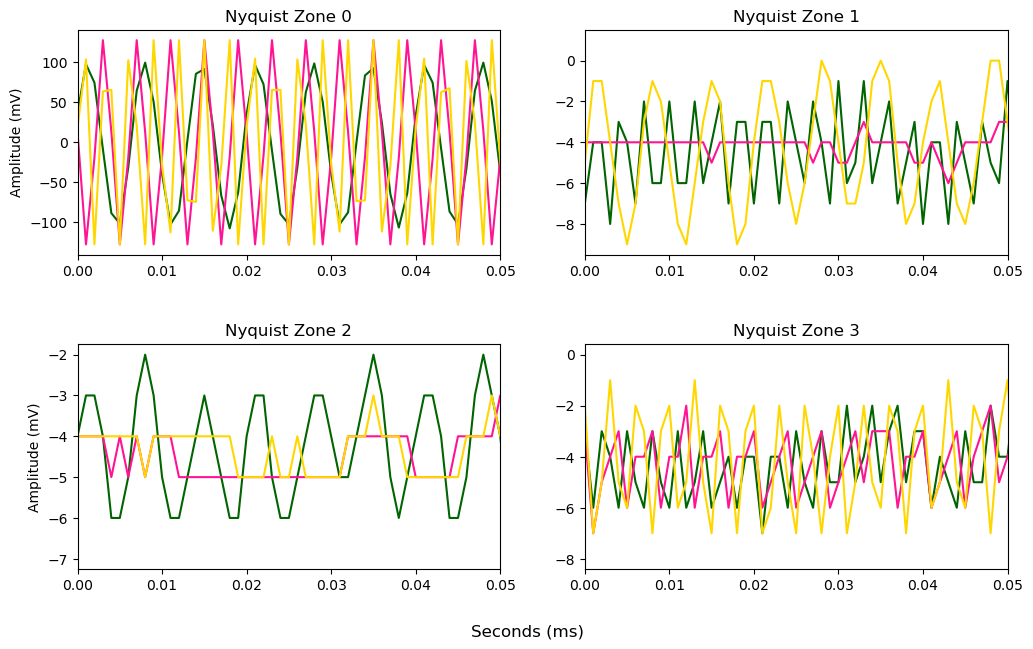

In [11]:
# ———————————————————— BOTTOM ROW: Amplitude vs Time ————————————————————
    # Sample Rate to Time Conversion
def N2time(v, N): # Takes the length of the array for each sample rate and divides it by the sampling rate, giving time
    return np.arange(N) / v

# Sample Rate Conversion
sample_rate = 1.0e6
t_Z0_150 = N2time(sample_rate, len(Z0_150[1]))
t_Z0_250 = N2time(sample_rate, len(Z0_250[1]))
t_Z0_350 = N2time(sample_rate, len(Z0_350[1]))

t_Z1_650 = N2time(sample_rate, len(Z1_650[1]))
t_Z1_750 = N2time(sample_rate, len(Z1_750[1]))
t_Z1_850 = N2time(sample_rate, len(Z1_850[1]))

t_Z2_1150 = N2time(sample_rate, len(Z2_1150[1]))
t_Z2_1250 = N2time(sample_rate, len(Z2_1250[1]))
t_Z2_1350 = N2time(sample_rate, len(Z2_1350[1]))

t_Z3_1650 = N2time(sample_rate, len(Z3_1650[1]))
t_Z3_1750 = N2time(sample_rate, len(Z3_1750[1]))
t_Z3_1850 = N2time(sample_rate, len(Z3_1850[1]))

# # Maximum values in each array
# # Zone 0
# print(np.max(Z0_150[1]))
# print(np.max(Z0_250[1]))
# print(np.max(Z0_350[1]))

# # Zone 1
# print(np.max(Z1_650[1]))
# print(np.max(Z1_750[1]))
# print(np.max(Z1_850[1]))

# # Zone 2
# print(np.max(Z2_1150[1]))
# print(np.max(Z2_1250[1]))
# print(np.max(Z2_1350[1]))
 
# # Zone 3
# print(np.max(Z3_1650[1]))
# print(np.max(Z3_1750[1]))
# print(np.max(Z3_1850[1]))

fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=False, sharex=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(t_Z0_150*1000, # Converting to the correct units of time, milliseconds
         Z0_150[1], color='darkgreen') # label="150 kHz")
ax.plot(t_Z0_250*1000, Z0_250[1], color='deeppink') # label="250 kHz")
ax.plot(t_Z0_350*1000, Z0_350[1], color='gold') # label="350 kHz")
ax.set_ylabel('Amplitude (mV)')
ax.set_title('Nyquist Zone 0')
# ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(t_Z1_650*1000, Z1_650[1], color='darkgreen') # label="650 kHz")
ax.plot(t_Z1_750*1000, Z1_750[1], color='deeppink') # label="750 kHz")
ax.plot(t_Z1_850*1000, Z1_850[1], color='gold') # label="850 kHz")
# ax.set_ylabel('Amplitude (mV)')
ax.set_title('Nyquist Zone 1')
# ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]
ax.plot(t_Z2_1150*1000, Z2_1150[1], color='darkgreen') # label="1150 kHz")
ax.plot(t_Z2_1250*1000, Z2_1250[1], color='deeppink') # label="1250 kHz")
ax.plot(t_Z2_1350*1000, Z2_1350[1], color='gold') # label="1350 kHz")
ax.set_ylabel('Amplitude (mV)')
ax.set_title('Nyquist Zone 2')
# ax.legend()
# ax.show()

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]
ax.plot(t_Z3_1650*1000, Z3_1650[1], color='darkgreen') # label="1650 kHz")
ax.plot(t_Z3_1750*1000, Z3_1750[1], color='deeppink') # label="1750 kHz")
ax.plot(t_Z3_1850*1000, Z3_1850[1], color='gold') # label="1850 kHz")
# ax.set_ylabel('Amplitude (mV)')
ax.set_title('Nyquist Zone 3')
# # ax.legend()
# ax.show()

# Zoom x-axis to first 0.10 milliseconds for all subplots
for ax in axes.flat:
    ax.set_xlim(0, 0.05)

# Put legends OUTSIDE for top row
# for ax in axes[0, :]:
#     ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0), borderaxespad=0., fontsize=9, framealpha=0.95)

fig.supxlabel('Seconds (ms)')
fig.subplots_adjust(hspace=0.4)
# plt.tight_layout(rect=[0, 0.05, 1, 1])

## 5.4 Voltage Spectra and Power Spectra
Now that we have data for each Nyquist zone, we want to understand how much signal is present at each frequency and its phase (complex voltage spectrum), what frequencies are present (voltage spectrum), and the strength of each frequency (power spectrum)!

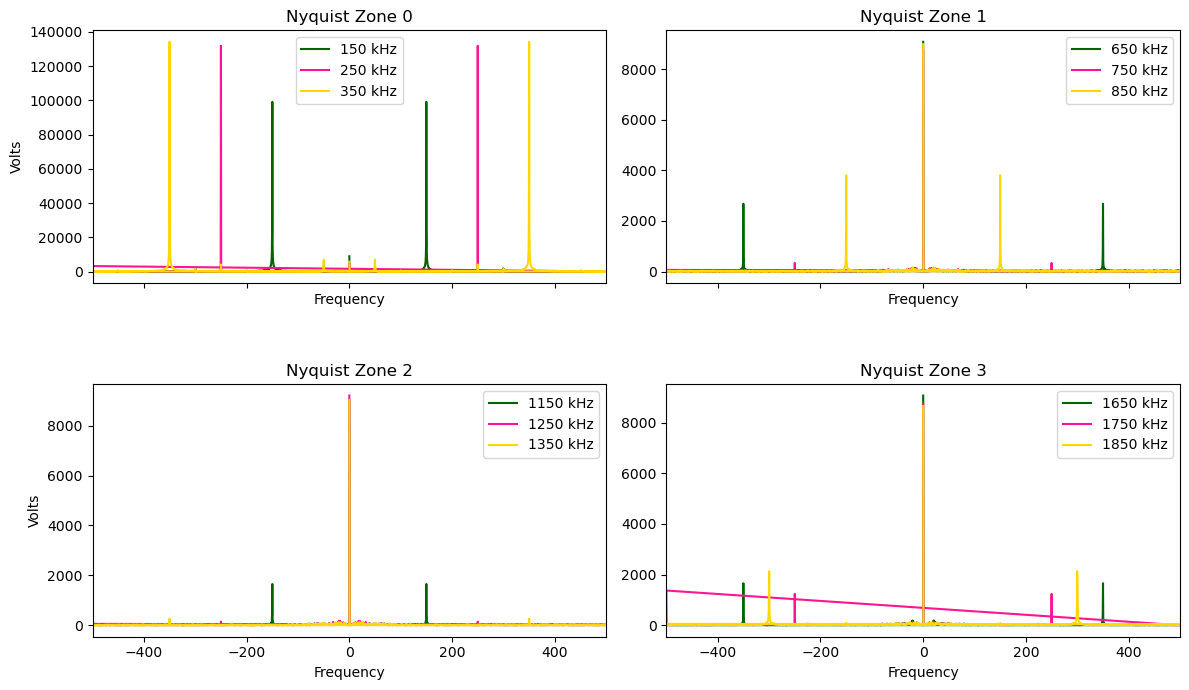

In [13]:
# Plotting the Voltage Spectrum

dt = 1 / sample_rate # Consistent time since only one sampling rate

# ———————————————————— Nyquist Zone 0 ————————————————————
Xf_150 = np.fft.fft(Z0_150[1]) # Frequency bins
freq150 = np.fft.fftfreq(len(Z0_150[1]), d=dt) # Generates frequency values in each bin in Xf

Xf_250 = np.fft.fft(Z0_250[1])
freq250 = np.fft.fftfreq(len(Z0_250[1]), d=dt)

Xf_350 = np.fft.fft(Z0_350[1])
freq350 = np.fft.fftfreq(len(Z0_350[1]), d=dt)

# Computing voltage, the magnitude of each frequency bin
V_150 = np.abs(Xf_150)
V_250 = np.abs(Xf_250)
V_350 = np.abs(Xf_350)



# ———————————————————— Nyquist Zone 1 ————————————————————
Xf_650 = np.fft.fft(Z1_650[1]) # Frequency bins
freq650 = np.fft.fftfreq(len(Z1_650[1]), d=dt) # Generates frequency values in each bin in Xf

Xf_750 = np.fft.fft(Z1_750[1])
freq750 = np.fft.fftfreq(len(Z1_750[1]), d=dt)

Xf_850 = np.fft.fft(Z1_850[1])
freq850 = np.fft.fftfreq(len(Z1_850[1]), d=dt)

V_650 = np.abs(Xf_650)
V_750 = np.abs(Xf_750)
V_850 = np.abs(Xf_850)



# ———————————————————— Nyquist Zone 2 ————————————————————
Xf_1150 = np.fft.fft(Z2_1150[1]) # Frequency bins
freq1150 = np.fft.fftfreq(len(Z2_1150[1]), d=dt) # Generates frequency values in each bin in Xf

Xf_1250 = np.fft.fft(Z2_1250[1])
freq1250 = np.fft.fftfreq(len(Z2_1250[1]), d=dt)

Xf_1350 = np.fft.fft(Z2_1350[1])
freq1350 = np.fft.fftfreq(len(Z2_1350[1]), d=dt)

V_1150 = np.abs(Xf_1150)
V_1250 = np.abs(Xf_1250)
V_1350 = np.abs(Xf_1350)



# ———————————————————— Nyquist Zone 3 ————————————————————
Xf_1650 = np.fft.fft(Z3_1650[1]) # Frequency bins
freq1650 = np.fft.fftfreq(len(Z3_1650[1]), d=dt)

Xf_1750 = np.fft.fft(Z3_1750[1])
freq1750 = np.fft.fftfreq(len(Z3_1750[1]), d=dt)

Xf_1850 = np.fft.fft(Z3_1850[1])
freq1850 = np.fft.fftfreq(len(Z3_1850[1]), d=dt)

V_1650 = np.abs(Xf_1650)
V_1750 = np.abs(Xf_1750)
V_1850 = np.abs(Xf_1850)



# ———————————————————— Plot Information ————————————————————
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True, sharey=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(freq150 / 1e3, V_150, color='darkgreen', label='150 kHz')
ax.plot(freq250 / 1e3, V_250, color='deeppink',  label='250 kHz')
ax.plot(freq350 / 1e3, V_350, color='gold',      label='350 kHz')
ax.set_title('Nyquist Zone 0')
ax.set_xlim(-500, 500)
ax.set_ylabel('Volts')
ax.set_xlabel('Frequency')
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(freq650 / 1e3, V_650, color='darkgreen', label='650 kHz')
ax.plot(freq750 / 1e3, V_750, color='deeppink',  label='750 kHz')
ax.plot(freq850 / 1e3, V_850, color='gold',      label='850 kHz')
ax.set_title('Nyquist Zone 1')
ax.set_xlim(-500, 500)
ax.set_xlabel('Frequency')
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]
ax.plot(freq1150 / 1e3, V_1150, color='darkgreen', label='1150 kHz')
ax.plot(freq1250 / 1e3, V_1250, color='deeppink',  label='1250 kHz')
ax.plot(freq1350 / 1e3, V_1350, color='gold',      label='1350 kHz')
ax.set_title('Nyquist Zone 2')
ax.set_xlim(-500, 500)
ax.set_ylabel('Volts')
ax.set_xlabel('Frequency')
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]
ax.plot(freq1650 / 1e3, V_1650, color='darkgreen', label='1650 kHz')
ax.plot(freq1750 / 1e3, V_1750, color='deeppink',  label='1750 kHz')
ax.plot(freq1850 / 1e3, V_1850, color='gold',      label='1850 kHz')
ax.set_title('Nyquist Zone 3')
ax.set_xlim(-500, 500)
ax.set_xlabel('Frequency')
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Global labels ————————————————————
# fig.supxlabel('Frequency (kHz)')
# fig.supylabel('Voltage')

plt.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()

### Some notes on the data above
This data is getting there, but we need to shift it using a fourier transform! What does a fourier transform do, you may be wondering? Well it ... (come back to)!

We are also going to convert the voltage into decibels using the following conversion: 10*np.log([INPUT HERE])

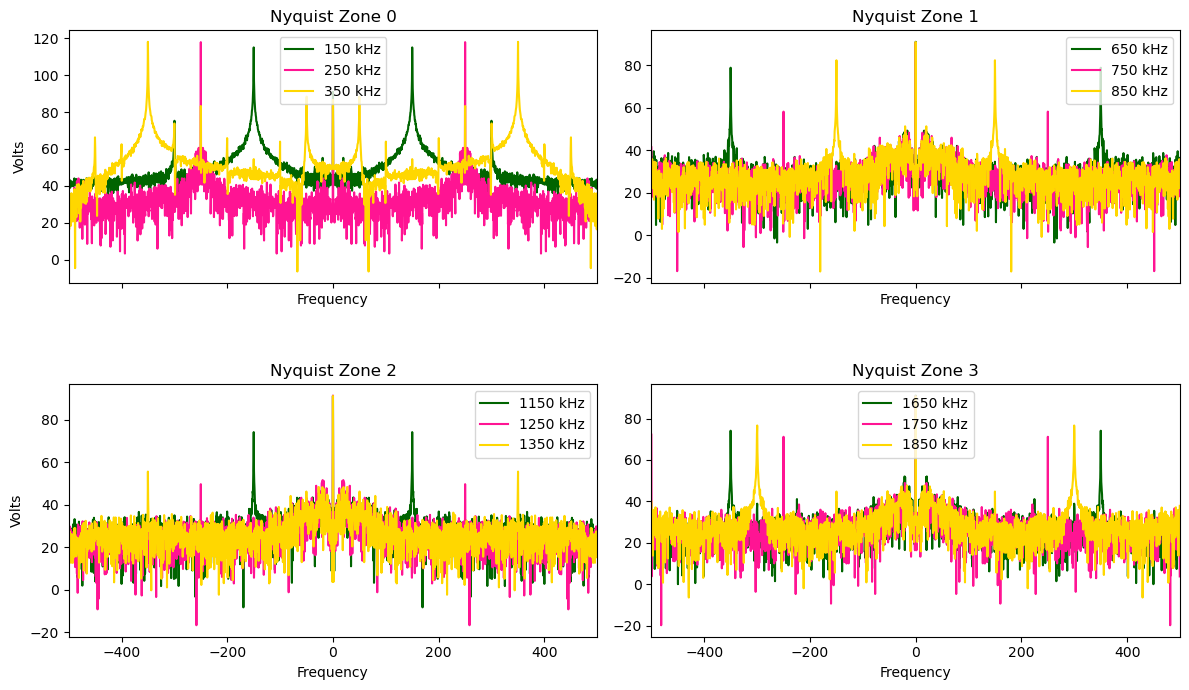

In [15]:
# Plotting the Shifted Voltage Spectrum

# ———————————————————— Nyquist Zone 0 ————————————————————
Shift_Xf_150 = np.fft.fftshift(Xf_150) # Frequency bins
Shift_freq150 = np.fft.fftshift(freq150) # Generates frequency values in each bin in Xf

Shift_Xf_250 = np.fft.fftshift(Xf_250)
Shift_freq250 = np.fft.fftshift(freq250)

Shift_Xf_350 = np.fft.fftshift(Xf_350)
Shift_freq350 = np.fft.fftshift(freq350)

# Computing voltage, the magnitude of each frequency bin
Shift_V_150 = np.abs(Shift_Xf_150)
Shift_V_250 = np.abs(Shift_Xf_250)
Shift_V_350 = np.abs(Shift_Xf_350)



# ———————————————————— Nyquist Zone 1 ————————————————————
Shift_Xf_650 = np.fft.fftshift(Xf_650)
Shift_freq650 = np.fft.fftshift(freq650)

Shift_Xf_750 = np.fft.fftshift(Xf_750)
Shift_freq750 = np.fft.fftshift(freq750)

Shift_Xf_850 = np.fft.fftshift(Xf_850)
Shift_freq850 = np.fft.fftshift(freq850)

Shift_V_650 = np.abs(Shift_Xf_650)
Shift_V_750 = np.abs(Shift_Xf_750)
Shift_V_850 = np.abs(Shift_Xf_850)



# ———————————————————— Nyquist Zone 2 ————————————————————
Shift_Xf_1150 = np.fft.fftshift(Xf_1150) # Frequency bins
Shift_freq1150 = np.fft.fftshift(freq1150) # Generates frequency values in each bin in Xf

Shift_Xf_1250 = np.fft.fftshift(Xf_1250)
Shift_freq1250 = np.fft.fftshift(freq1250)

Shift_Xf_1350 = np.fft.fftshift(Xf_1350)
Shift_freq1350 = np.fft.fftshift(freq1350)

Shift_V_1150 = np.abs(Shift_Xf_1150)
Shift_V_1250 = np.abs(Shift_Xf_1250)
Shift_V_1350 = np.abs(Shift_Xf_1350)



# ———————————————————— Nyquist Zone 3 ————————————————————
Shift_Xf_1650 = np.fft.fftshift(Xf_1650)
Shift_freq1650 = np.fft.fftshift(freq1650)

Shift_Xf_1750 = np.fft.fftshift(Xf_1750)
Shift_freq1750 = np.fft.fftshift(freq1750)

Shift_Xf_1850 = np.fft.fftshift(Xf_1850)
Shift_freq1850 = np.fft.fftshift(freq1850)

Shift_V_1650 = np.abs(Shift_Xf_1650)
Shift_V_1750 = np.abs(Shift_Xf_1750)
Shift_V_1850 = np.abs(Shift_Xf_1850)



# ———————————————————— Plot Information ————————————————————
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True, sharey=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(Shift_freq150 / 1e3, 10*np.log(Shift_V_150), color='darkgreen', label='150 kHz')
ax.plot(Shift_freq250 / 1e3, 10*np.log(Shift_V_250), color='deeppink',  label='250 kHz')
ax.plot(Shift_freq350 / 1e3, 10*np.log(Shift_V_350), color='gold',      label='350 kHz')
ax.set_title('Nyquist Zone 0')
ax.set_xlim(-500, 500)
ax.set_ylabel('Volts')
ax.set_xlabel('Frequency')
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(Shift_freq650 / 1e3, 10*np.log(Shift_V_650), color='darkgreen', label='650 kHz')
ax.plot(Shift_freq750 / 1e3, 10*np.log(Shift_V_750), color='deeppink',  label='750 kHz')
ax.plot(Shift_freq850 / 1e3, 10*np.log(Shift_V_850), color='gold',      label='850 kHz')
ax.set_title('Nyquist Zone 1')
ax.set_xlim(-500, 500)
ax.set_xlabel('Frequency')
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]
ax.plot(Shift_freq1150 / 1e3, 10*np.log(Shift_V_1150), color='darkgreen', label='1150 kHz')
ax.plot(Shift_freq1250 / 1e3, 10*np.log(Shift_V_1250), color='deeppink',  label='1250 kHz')
ax.plot(Shift_freq1350 / 1e3, 10*np.log(Shift_V_1350), color='gold',      label='1350 kHz')
ax.set_title('Nyquist Zone 2')
ax.set_xlim(-500, 500)
ax.set_ylabel('Volts')
ax.set_xlabel('Frequency')
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]
ax.plot(Shift_freq1650 / 1e3, 10*np.log(Shift_V_1650), color='darkgreen', label='1650 kHz')
ax.plot(Shift_freq1750 / 1e3, 10*np.log(Shift_V_1750), color='deeppink',  label='1750 kHz')
ax.plot(Shift_freq1850 / 1e3, 10*np.log(Shift_V_1850), color='gold',      label='1850 kHz')
ax.set_title('Nyquist Zone 3')
ax.set_xlim(-500, 500)
ax.set_xlabel('Frequency')
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Global labels ————————————————————
# fig.supxlabel('Frequency (kHz)')
# fig.supylabel('Voltage')

plt.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()

### Some notes on the data above
Wow, doesn't that look better! Rather than two big spikes, the conversion allows you to see everything going into the voltage spectrum!

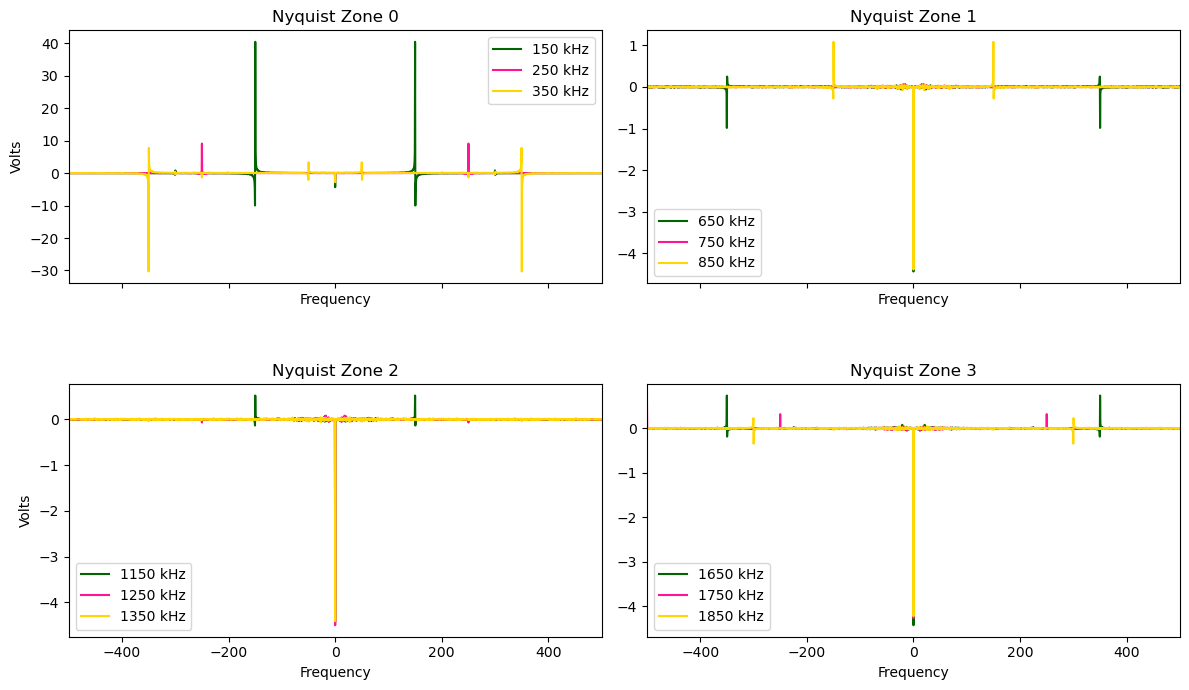

In [17]:
# Plotting the REAL Elements of a Complex Voltage Spectrum

# Using the same shifted data as the voltage spectrum for each frequency!

# ———————————————————— Plot Information ————————————————————
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True, sharey=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(Shift_freq150 / 1e3, np.real((Shift_Xf_150) / len(Z0_150[1])), color='darkgreen', label='150 kHz')
ax.plot(Shift_freq250 / 1e3, np.real((Shift_Xf_250) / len(Z0_250[1])), color='deeppink',  label='250 kHz')
ax.plot(Shift_freq350 / 1e3, np.real((Shift_Xf_350) / len(Z0_350[1])), color='gold',      label='350 kHz')
ax.set_title('Nyquist Zone 0')
ax.set_xlim(-500, 500)
ax.set_ylabel('Volts')
ax.set_xlabel('Frequency')
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(Shift_freq650 / 1e3, np.real((Shift_Xf_650) / len(Z1_650[1])), color='darkgreen', label='650 kHz')
ax.plot(Shift_freq750 / 1e3, np.real((Shift_Xf_750) / len(Z1_750[1])), color='deeppink',  label='750 kHz')
ax.plot(Shift_freq850 / 1e3, np.real((Shift_Xf_850) / len(Z1_850[1])), color='gold',      label='850 kHz')
ax.set_title('Nyquist Zone 1')
ax.set_xlim(-500, 500)
ax.set_xlabel('Frequency')
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]
ax.plot(Shift_freq1150 / 1e3, np.real((Shift_Xf_1150) / len(Z2_1150[1])), color='darkgreen', label='1150 kHz')
ax.plot(Shift_freq1250 / 1e3, np.real((Shift_Xf_1250) / len(Z2_1250[1])), color='deeppink',  label='1250 kHz')
ax.plot(Shift_freq1350 / 1e3, np.real((Shift_Xf_1350) / len(Z2_1350[1])), color='gold',      label='1350 kHz')
ax.set_title('Nyquist Zone 2')
ax.set_xlim(-500, 500)
ax.set_ylabel('Volts')
ax.set_xlabel('Frequency')
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]
ax.plot(Shift_freq1650 / 1e3, np.real((Shift_Xf_1650) / len(Z3_1650[1])), color='darkgreen', label='1650 kHz')
ax.plot(Shift_freq1750 / 1e3, np.real((Shift_Xf_1750) / len(Z3_1750[1])), color='deeppink',  label='1750 kHz')
ax.plot(Shift_freq1850 / 1e3, np.real((Shift_Xf_1850) / len(Z3_1850[1])), color='gold',      label='1850 kHz')
ax.set_title('Nyquist Zone 3')
ax.set_xlim(-500, 500)
ax.set_xlabel('Frequency')
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Global labels ————————————————————
# fig.supxlabel('Frequency (kHz)')
# fig.supylabel('Voltage')

plt.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()

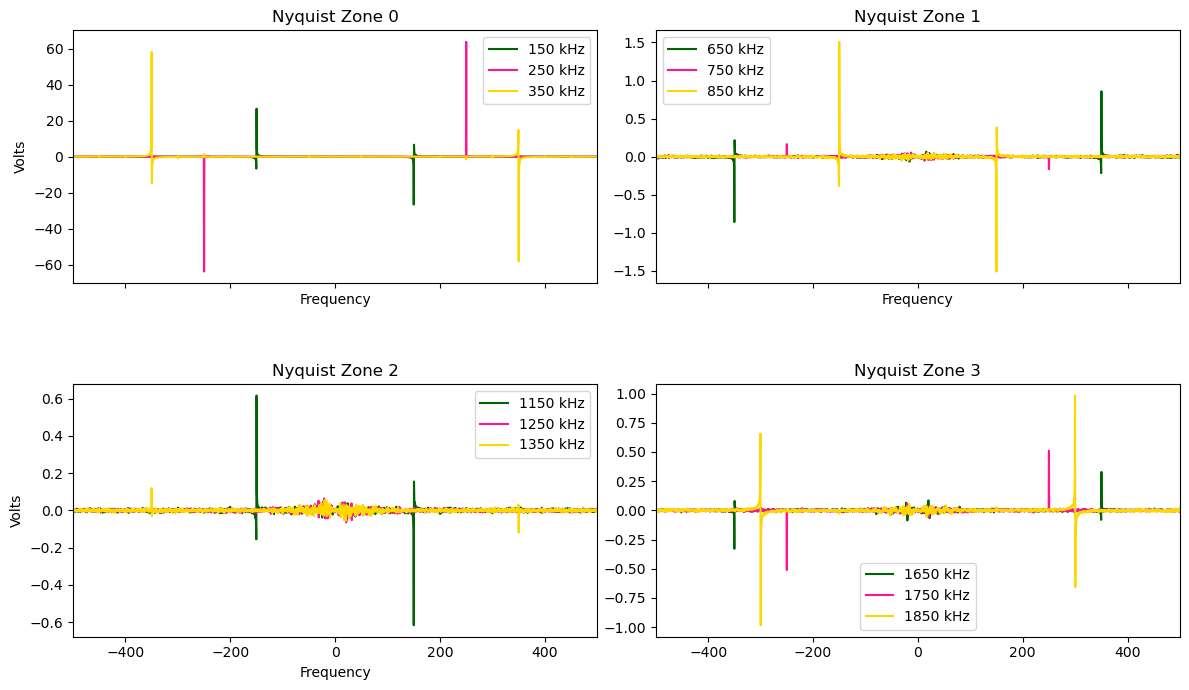

In [18]:
# Plotting the IMAGINARY Elements of a Complex Voltage Spectrum

# Using the same shifted data as the voltage spectrum for each frequency!

# ———————————————————— Plot Information ————————————————————
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True, sharey=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(Shift_freq150 / 1e3, np.imag((Shift_Xf_150) / len(Z0_150[1])), color='darkgreen', label='150 kHz')
ax.plot(Shift_freq250 / 1e3, np.imag((Shift_Xf_250) / len(Z0_250[1])), color='deeppink',  label='250 kHz')
ax.plot(Shift_freq350 / 1e3, np.imag((Shift_Xf_350) / len(Z0_350[1])), color='gold',      label='350 kHz')
ax.set_title('Nyquist Zone 0')
ax.set_xlim(-500, 500)
ax.set_ylabel('Volts')
ax.set_xlabel('Frequency')
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(Shift_freq650 / 1e3, np.imag((Shift_Xf_650) / len(Z1_650[1])), color='darkgreen', label='650 kHz')
ax.plot(Shift_freq750 / 1e3, np.imag((Shift_Xf_750) / len(Z1_750[1])), color='deeppink',  label='750 kHz')
ax.plot(Shift_freq850 / 1e3, np.imag((Shift_Xf_850) / len(Z1_850[1])), color='gold',      label='850 kHz')
ax.set_title('Nyquist Zone 1')
ax.set_xlabel('Frequency')
ax.set_xlim(-500, 500)
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]
ax.plot(Shift_freq1150 / 1e3, np.imag((Shift_Xf_1150) / len(Z2_1150[1])), color='darkgreen', label='1150 kHz')
ax.plot(Shift_freq1250 / 1e3, np.imag((Shift_Xf_1250) / len(Z2_1250[1])), color='deeppink',  label='1250 kHz')
ax.plot(Shift_freq1350 / 1e3, np.imag((Shift_Xf_1350) / len(Z2_1350[1])), color='gold',      label='1350 kHz')
ax.set_title('Nyquist Zone 2')
ax.set_xlim(-500, 500)
ax.set_ylabel('Volts')
ax.set_xlabel('Frequency')
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]
ax.plot(Shift_freq1650 / 1e3, np.imag((Shift_Xf_1650) / len(Z3_1650[1])), color='darkgreen', label='1650 kHz')
ax.plot(Shift_freq1750 / 1e3, np.imag((Shift_Xf_1750) / len(Z3_1750[1])), color='deeppink',  label='1750 kHz')
ax.plot(Shift_freq1850 / 1e3, np.imag((Shift_Xf_1850) / len(Z3_1850[1])), color='gold',      label='1850 kHz')
ax.set_title('Nyquist Zone 3')
ax.set_xlim(-500, 500)
ax.legend()
# ax.grid(alpha=0.3)

# ———————————————————— Global labels ————————————————————
# fig.supylabel('Voltage')

plt.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()

### Some notes of the data above
Now we can see the real and the imaginary parts in each of the Nyquist zones! To see the patterns for clearly, we can plot them ontop of each other for a specific frequency, as shown below.

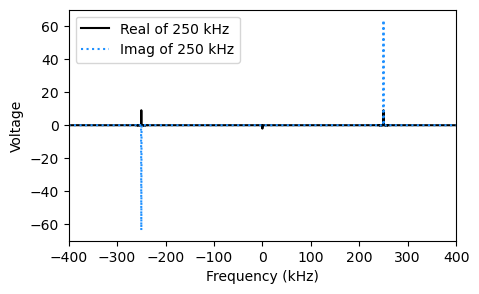

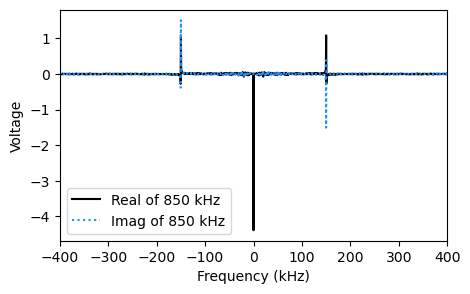

In [20]:
plt.figure(figsize=(5,3))
plt.plot(Shift_freq250 / 1e3, np.real((Shift_Xf_250) / len(Z0_250[1])), color='black', label='Real of 250 kHz')
plt.plot(Shift_freq250 / 1e3, np.imag((Shift_Xf_250) / len(Z0_250[1])), color='dodgerblue', linestyle=':', label='Imag of 250 kHz')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Voltage')
plt.xlim(-400,400)
plt.legend()
plt.show()

plt.figure(figsize=(5,3))
plt.plot(Shift_freq850 / 1e3, np.real((Shift_Xf_850) / len(Z1_850[1])), color='black', label='Real of 850 kHz')
plt.plot(Shift_freq850 / 1e3, np.imag((Shift_Xf_850) / len(Z1_850[1])), color='dodgerblue', linestyle=':', label='Imag of 850 kHz')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Voltage')
plt.xlim(-400,400)
plt.legend()
plt.show()

Finally, we can plot all of the real and imaginary elements on the same plots for each Nyquist zones. Let's see what that will look like!

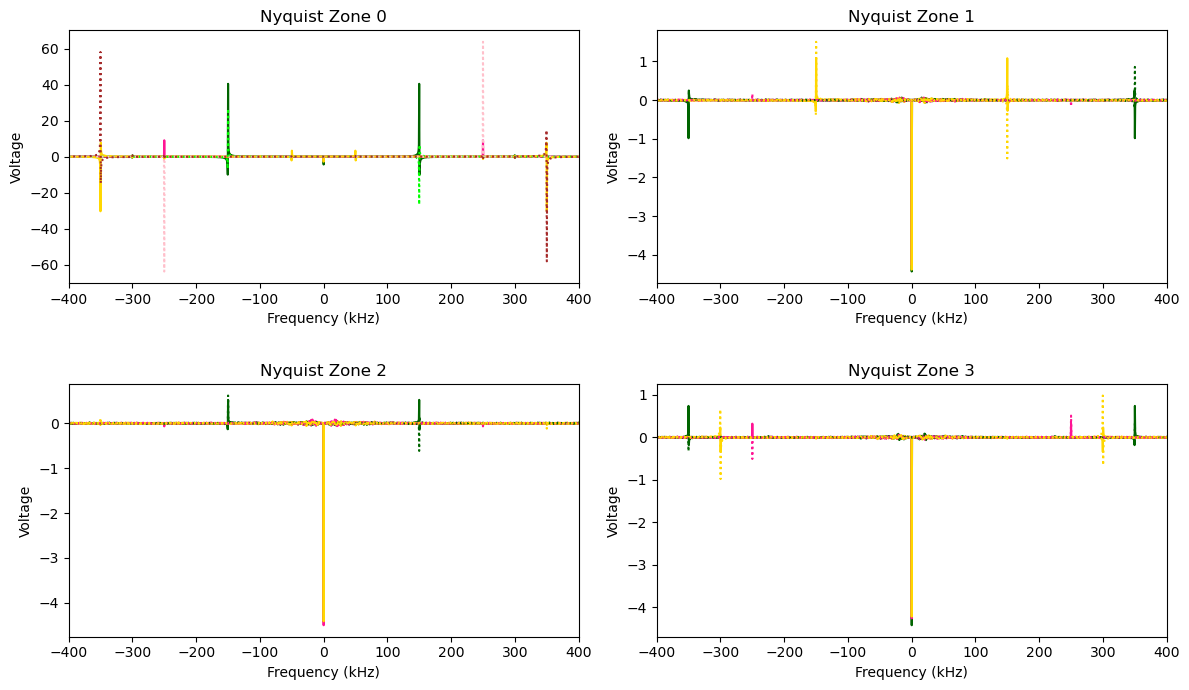

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]

ax.plot(Shift_freq150 / 1e3, np.real((Shift_Xf_150) / len(Z0_150[1])), color='darkgreen')
ax.plot(Shift_freq250 / 1e3, np.real((Shift_Xf_250) / len(Z0_250[1])), color='deeppink')
ax.plot(Shift_freq350 / 1e3, np.real((Shift_Xf_350) / len(Z0_350[1])), color='gold')

ax.plot(Shift_freq150 / 1e3, np.imag((Shift_Xf_150) / len(Z0_150[1])), color='lime', linestyle=':')
ax.plot(Shift_freq250 / 1e3, np.imag((Shift_Xf_250) / len(Z0_250[1])), color='pink', linestyle=':')
ax.plot(Shift_freq350 / 1e3, np.imag((Shift_Xf_350) / len(Z0_350[1])), color='brown', linestyle=':')

ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Voltage')
ax.set_title('Nyquist Zone 0')
ax.set_xlim(-400, 400)

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]

ax.plot(Shift_freq650 / 1e3, np.real((Shift_Xf_650) / len(Z1_650[1])), color='darkgreen')
ax.plot(Shift_freq750 / 1e3, np.real((Shift_Xf_750) / len(Z1_750[1])), color='deeppink')
ax.plot(Shift_freq850 / 1e3, np.real((Shift_Xf_850) / len(Z1_850[1])), color='gold')

ax.plot(Shift_freq650 / 1e3, np.imag((Shift_Xf_650) / len(Z1_650[1])), color='darkgreen', linestyle=':')
ax.plot(Shift_freq750 / 1e3, np.imag((Shift_Xf_750) / len(Z1_750[1])), color='deeppink', linestyle=':')
ax.plot(Shift_freq850 / 1e3, np.imag((Shift_Xf_850) / len(Z1_850[1])), color='gold', linestyle=':')

ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Voltage')
ax.set_title('Nyquist Zone 1')
ax.set_xlim(-400, 400)

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]

ax.plot(Shift_freq1150 / 1e3, np.real((Shift_Xf_1150) / len(Z2_1150[1])), color='darkgreen')
ax.plot(Shift_freq1250 / 1e3, np.real((Shift_Xf_1250) / len(Z2_1250[1])), color='deeppink')
ax.plot(Shift_freq1350 / 1e3, np.real((Shift_Xf_1350) / len(Z2_1350[1])), color='gold')

ax.plot(Shift_freq1150 / 1e3, np.imag((Shift_Xf_1150) / len(Z2_1150[1])), color='darkgreen', linestyle=':')
ax.plot(Shift_freq1250 / 1e3, np.imag((Shift_Xf_1250) / len(Z2_1250[1])), color='deeppink', linestyle=':')
ax.plot(Shift_freq1350 / 1e3, np.imag((Shift_Xf_1350) / len(Z2_1350[1])), color='gold', linestyle=':')

ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Voltage')
ax.set_title('Nyquist Zone 2')
ax.set_xlim(-400, 400)

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]

ax.plot(Shift_freq1650 / 1e3, np.real((Shift_Xf_1650) / len(Z3_1650[1])), color='darkgreen')
ax.plot(Shift_freq1750 / 1e3, np.real((Shift_Xf_1750) / len(Z3_1750[1])), color='deeppink')
ax.plot(Shift_freq1850 / 1e3, np.real((Shift_Xf_1850) / len(Z3_1850[1])), color='gold')

ax.plot(Shift_freq1650 / 1e3, np.imag((Shift_Xf_1650) / len(Z3_1650[1])), color='darkgreen', linestyle=':')
ax.plot(Shift_freq1750 / 1e3, np.imag((Shift_Xf_1750) / len(Z3_1750[1])), color='deeppink', linestyle=':')
ax.plot(Shift_freq1850 / 1e3, np.imag((Shift_Xf_1850) / len(Z3_1850[1])), color='gold', linestyle=':')

ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Voltage')
ax.set_title('Nyquist Zone 3')
ax.set_xlim(-400, 400)

plt.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()

TypeError: Axis.set_ticks() takes from 2 to 3 positional arguments but 8 were given

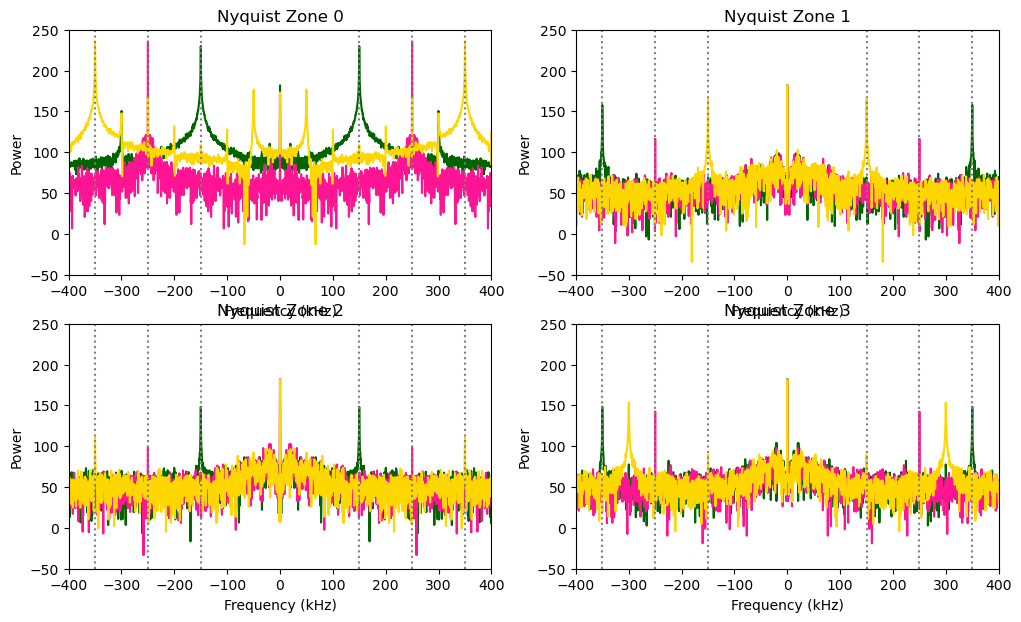

In [64]:
# Plotting the Power Spectrum
# Computing power, the magnitude squared of each frequency bin

Shift_P_150  = np.abs(Shift_Xf_150)**2
Shift_P_250  = np.abs(Shift_Xf_250)**2
Shift_P_350  = np.abs(Shift_Xf_350)**2

Shift_P_650  = np.abs(Shift_Xf_650)**2
Shift_P_750  = np.abs(Shift_Xf_750)**2
Shift_P_850  = np.abs(Shift_Xf_850)**2

Shift_P_1150 = np.abs(Shift_Xf_1150)**2
Shift_P_1250 = np.abs(Shift_Xf_1250)**2
Shift_P_1350 = np.abs(Shift_Xf_1350)**2

Shift_P_1650 = np.abs(Shift_Xf_1650)**2
Shift_P_1750 = np.abs(Shift_Xf_1750)**2
Shift_P_1850 = np.abs(Shift_Xf_1850)**2


fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharey=False)

# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(Shift_freq150 / 1e3, 10*np.log(Shift_P_150), color='darkgreen')
ax.plot(Shift_freq250 / 1e3, 10*np.log(Shift_P_250), color='deeppink')
ax.plot(Shift_freq350 / 1e3, 10*np.log(Shift_P_350), color='gold')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Power')
ax.set_title('Nyquist Zone 0')
ax.set_xlim(-400, 400)
ax.set_ylim(-50, 250)

# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(Shift_freq650 / 1e3, 10*np.log(Shift_P_650), color='darkgreen')
ax.plot(Shift_freq750 / 1e3, 10*np.log(Shift_P_750), color='deeppink')
ax.plot(Shift_freq850 / 1e3, 10*np.log(Shift_P_850), color='gold')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Power')
ax.set_title('Nyquist Zone 1')
ax.set_xlim(-400, 400)
ax.set_ylim(-50, 250)

# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]
ax.plot(Shift_freq1150 / 1e3, 10*np.log(Shift_P_1150), color='darkgreen')
ax.plot(Shift_freq1250 / 1e3, 10*np.log(Shift_P_1250), color='deeppink')
ax.plot(Shift_freq1350 / 1e3, 10*np.log(Shift_P_1350), color='gold')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Power')
ax.set_title('Nyquist Zone 2')
ax.set_xlim(-400, 400)
ax.set_ylim(-50, 250)

# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]
ax.plot(Shift_freq1650 / 1e3, 10*np.log(Shift_P_1650), color='darkgreen')
ax.plot(Shift_freq1750 / 1e3, 10*np.log(Shift_P_1750), color='deeppink')
ax.plot(Shift_freq1850 / 1e3, 10*np.log(Shift_P_1850), color='gold')
ax.axvline(x=-350, color='grey', linestyle=':')
ax.axvline(x=-250, color='grey', linestyle=':')
ax.axvline(x=-150, color='grey', linestyle=':')
ax.axvline(x=350, color='grey', linestyle=':')
ax.axvline(x=250, color='grey', linestyle=':')
ax.axvline(x=150, color='grey', linestyle=':')
ax.set_xlabel('Frequency (kHz)')
ax.set_ylabel('Power')
ax.set_title('Nyquist Zone 3')
ax.set_xlim(-400, 400)
ax.set_ylim(-50, 250)
ax.set_xticks(-350,-250,-150,0,150,250,350)

plt.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()

### Some notes on the data above
Does it look exactly the same as the voltage spectrum? The amplitude is different, but why are the graphs looking the exact same? What does this mean for the overall data?

Well, since the data is being expressed in decibels, the data is supposed to look the "same" since they preserve the original shape!

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


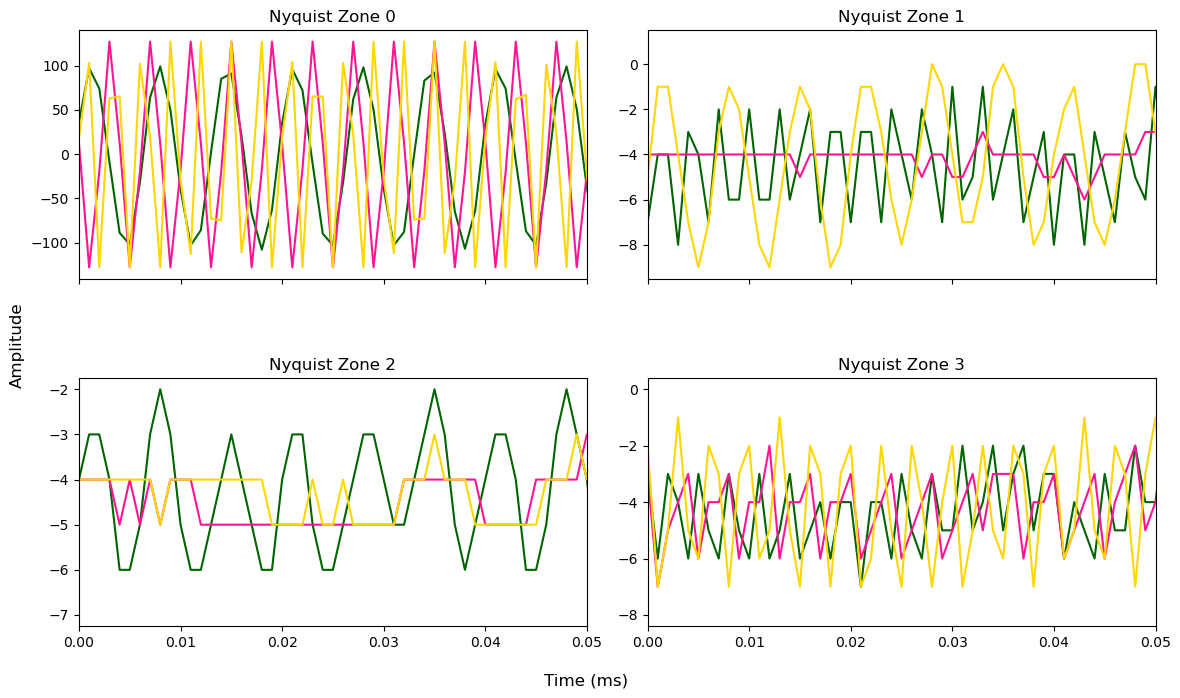

In [25]:
# Fourier Transform of a power series
# Inverse Fourier Transformation

# We want to use the UNSHIFTED data for our inverse fourier transform! So I am redefining the parameters

# ———————————————————— Nyquist Zone 0 ————————————————————
InverseFT_150 = np.fft.ifft(Xf_150)
InverseFT_250 = np.fft.ifft(Xf_250)
InverseFT_350 = np.fft.ifft(Xf_350)


# ———————————————————— Nyquist Zone 1 ————————————————————
InverseFT_650 = np.fft.ifft(Xf_650)
InverseFT_750 = np.fft.ifft(Xf_750)
InverseFT_850 = np.fft.ifft(Xf_850)

# ———————————————————— Nyquist Zone 2 ————————————————————
InverseFT_1150 = np.fft.ifft(Xf_1150)
InverseFT_1250 = np.fft.ifft(Xf_1250)
InverseFT_1350 = np.fft.ifft(Xf_1350)

# ———————————————————— Nyquist Zone 3 ————————————————————
InverseFT_1650 = np.fft.ifft(Xf_1650)
InverseFT_1750 = np.fft.ifft(Xf_1750)
InverseFT_1850 = np.fft.ifft(Xf_1850)



fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True, sharey=False)

# ---------------- Nyquist Zone 0 ----------------
ax = axes[0, 0]
ax.plot(t_Z0_150*1000, InverseFT_150, color='darkgreen')
ax.plot(t_Z0_250*1000, InverseFT_250, color='deeppink')
ax.plot(t_Z0_350*1000, InverseFT_350, color='gold')
ax.set_title('Nyquist Zone 0')
ax.set_xlim(0, 0.05)

# ---------------- Nyquist Zone 1 ----------------
ax = axes[0, 1]
ax.plot(t_Z1_650*1000, InverseFT_650, color='darkgreen')
ax.plot(t_Z1_750*1000, InverseFT_750, color='deeppink')
ax.plot(t_Z1_850*1000, InverseFT_850, color='gold')
ax.set_title('Nyquist Zone 1')
ax.set_xlim(0, 0.05)

# ---------------- Nyquist Zone 2 ----------------
ax = axes[1, 0]
ax.plot(t_Z2_1150*1000, InverseFT_1150, color='darkgreen')
ax.plot(t_Z2_1250*1000, InverseFT_1250, color='deeppink')
ax.plot(t_Z2_1350*1000, InverseFT_1350, color='gold')
ax.set_title('Nyquist Zone 2')
ax.set_xlim(0, 0.05)

# ---------------- Nyquist Zone 3 ----------------
ax = axes[1, 1]
ax.plot(t_Z3_1650*1000, InverseFT_1650, color='darkgreen')
ax.plot(t_Z3_1750*1000, InverseFT_1750, color='deeppink')
ax.plot(t_Z3_1850*1000, InverseFT_1850, color='gold')
ax.set_title('Nyquist Zone 3')
ax.set_xlim(0, 0.05)

# -------- Global labels --------
fig.supxlabel('Time (ms)')
fig.supylabel('Amplitude')

plt.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()

### Some notes on the data above
This is the reconstructed data, using the unshifted frequency bins! It gives the exact data back, showing that fourier transforms do not alter the data.

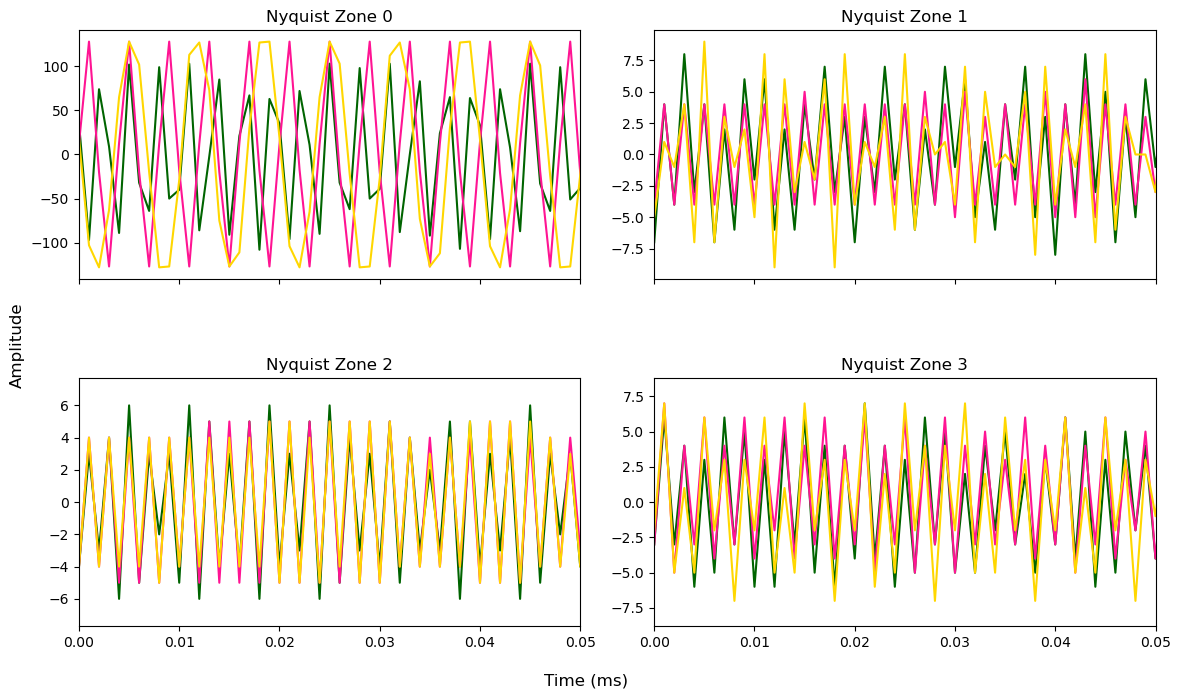

In [27]:
# Inverse Fourier Transformation

# We want to use the UNSHIFTED data for our inverse fourier transform! So I am redefining the parameters

# ———————————————————— Nyquist Zone 0 ————————————————————
Shift_InverseFT_150 = np.fft.ifft(Shift_Xf_150)
Shift_InverseFT_250 = np.fft.ifft(Shift_Xf_250)
Shift_InverseFT_350 = np.fft.ifft(Shift_Xf_350)


# ———————————————————— Nyquist Zone 1 ————————————————————
Shift_InverseFT_650 = np.fft.ifft(Shift_Xf_650)
Shift_InverseFT_750 = np.fft.ifft(Shift_Xf_750)
Shift_InverseFT_850 = np.fft.ifft(Shift_Xf_850)

# ———————————————————— Nyquist Zone 2 ————————————————————
Shift_InverseFT_1150 = np.fft.ifft(Shift_Xf_1150)
Shift_InverseFT_1250 = np.fft.ifft(Shift_Xf_1250)
Shift_InverseFT_1350 = np.fft.ifft(Shift_Xf_1350)

# ———————————————————— Nyquist Zone 3 ————————————————————
Shift_InverseFT_1650 = np.fft.ifft(Shift_Xf_1650)
Shift_InverseFT_1750 = np.fft.ifft(Shift_Xf_1750)
Shift_InverseFT_1850 = np.fft.ifft(Shift_Xf_1850)



fig, axes = plt.subplots(2, 2, figsize=(12, 7), sharex=True, sharey=False)

# ---------------- Nyquist Zone 0 ----------------
ax = axes[0, 0]
ax.plot(t_Z0_150*1000, Shift_InverseFT_150, color='darkgreen')
ax.plot(t_Z0_250*1000, Shift_InverseFT_250, color='deeppink')
ax.plot(t_Z0_350*1000, Shift_InverseFT_350, color='gold')
ax.set_title('Nyquist Zone 0')
ax.set_xlim(0, 0.05)

# ---------------- Nyquist Zone 1 ----------------
ax = axes[0, 1]
ax.plot(t_Z1_650*1000, Shift_InverseFT_650, color='darkgreen')
ax.plot(t_Z1_750*1000, Shift_InverseFT_750, color='deeppink')
ax.plot(t_Z1_850*1000, Shift_InverseFT_850, color='gold')
ax.set_title('Nyquist Zone 1')
ax.set_xlim(0, 0.05)

# ---------------- Nyquist Zone 2 ----------------
ax = axes[1, 0]
ax.plot(t_Z2_1150*1000, Shift_InverseFT_1150, color='darkgreen')
ax.plot(t_Z2_1250*1000, Shift_InverseFT_1250, color='deeppink')
ax.plot(t_Z2_1350*1000, Shift_InverseFT_1350, color='gold')
ax.set_title('Nyquist Zone 2')
ax.set_xlim(0, 0.05)

# ---------------- Nyquist Zone 3 ----------------
ax = axes[1, 1]
ax.plot(t_Z3_1650*1000, Shift_InverseFT_1650, color='darkgreen')
ax.plot(t_Z3_1750*1000, Shift_InverseFT_1750, color='deeppink')
ax.plot(t_Z3_1850*1000, Shift_InverseFT_1850, color='gold')
ax.set_title('Nyquist Zone 3')
ax.set_xlim(0, 0.05)

# -------- Global labels --------
fig.supxlabel('Time (ms)')
fig.supylabel('Amplitude')

plt.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()

### Some notes on the data above
This is the reconstructed data, using the shifted frequency bins! It gives the exact data back but now it is in phase, showing that fourier transforms do not alter the data itself, but moved it to be in correspondance with the other!

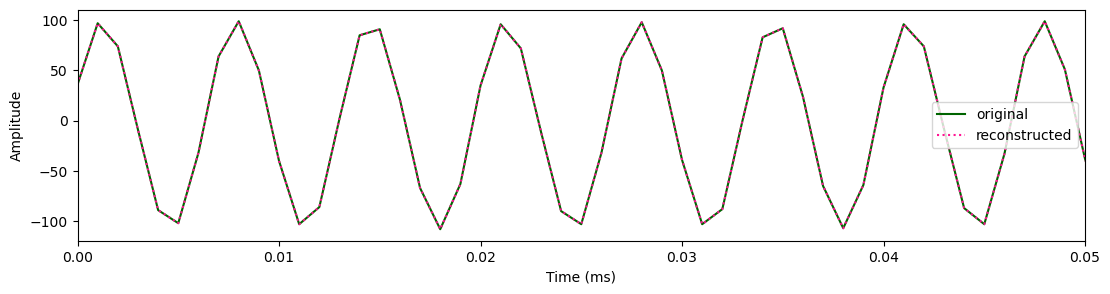

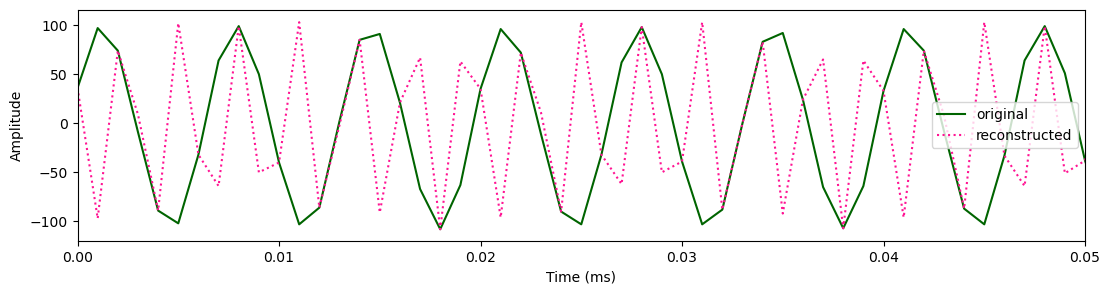

In [29]:
# Comparing the original signal and reconstructed signal using unshifted data
plt.figure(figsize=(13,3))
plt.plot(t_Z0_150*1000, Z0_150[1], color='darkgreen', label="original")
plt.plot(t_Z0_150*1000, InverseFT_150, color='deeppink', label="reconstructed", linestyle=':')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.xlim(0,0.05)
# plt.ylim(-200,200)
plt.legend()
plt.show()

# Comparing the original signal and reconstructed signal using shifted data
plt.figure(figsize=(13,3))
plt.plot(t_Z0_150*1000, Z0_150[1], color='darkgreen', label="original")
plt.plot(t_Z0_150*1000, Shift_InverseFT_150, color='deeppink', label="reconstructed", linestyle=':')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.xlim(0,0.05)
# plt.ylim(-200,200)
plt.legend()
plt.show()

### Some notes on the data above
Why does the shifted data get so different?

### Plotting the Autocorrelation Function
What is the autocorrelation function? It takes the voltage time series and then applies numpy.correlate and scipy.signal.correlate, we get the ACF.

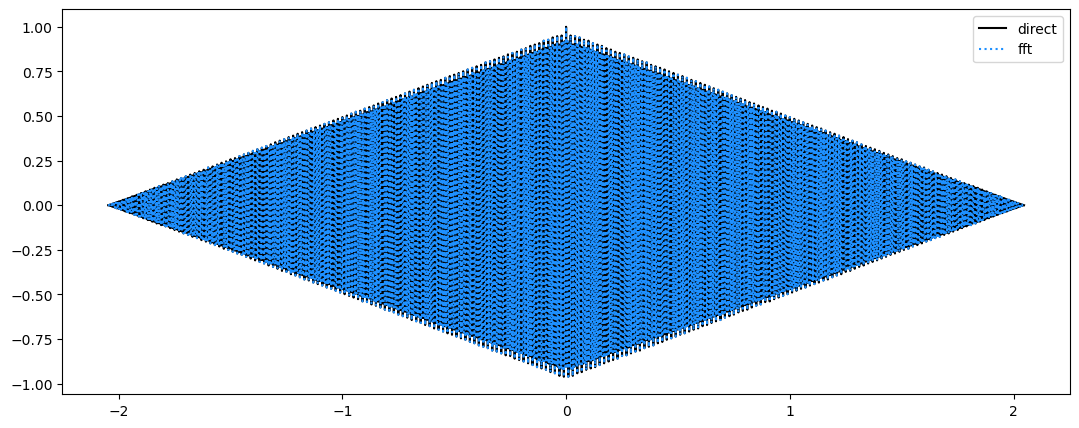

In [32]:
# Plotting the Autocorrelation Function using numpy

N_850 = len(Voltage_850)
N_pad = (2 * N) - 1

ACF = np.correlate(Voltage_850, Voltage_850, mode='full')
ACF = ACF / ACF[len(ACF)//2]

V_pad = np.zeros(N_pad, dtype=complex) # not complex?
V_pad[:N] = Voltage_850

FFT_V_pad = np.fft.fft(V_pad)
Power = np.abs(FFT_V_pad)**2
ACF_powspec = np.fft.ifft(Power).real
ACF_powspec = np.fft.fftshift(ACF_powspec)
ACF_powspec = ACF_powspec / ACF_powspec[len(ACF_powspec)//2]

lags = np.arange(-(N-1), N) / sample_rate

plt.figure(figsize=(13,5))
plt.plot(lags*1e3, ACF, color='black', label="direct")
plt.plot(lags*1e3, ACF_powspec, color='dodgerblue', label="fft", linestyle=':')
# plt.xlim([-100,100])
plt.legend()
plt.show()

In [33]:
# Plotting the Autocorrelation Function using scipy.signal.correlate

from scipy import signal

# Redefining the voltage for 
Voltage_850 = Z1_850[1]
Voltage_850 = Voltage_850 - np.mean(Voltage_850)

# Time step + sample rate from your time array
t_Z1_850 = N2time(sample_rate, len(Z1_850[1]))
dt = np.mean(np.diff(t_Z1_850))
sample_rate = 1.0 / dt

N = len(Voltage_850)
N_pad = (2 * N) - 1

# --- 2) Direct ACF using scipy.signal.correlate ---
ACF = signal.correlate(v, v, mode='full', method='direct')
ACF /= ACF_direct[len(ACF_direct)//2]

# Lags (seconds) using SciPy helper (recommended)
lags = signal.correlation_lags(N, N, mode='full') * dt

# --- 3) FFT-based ACF (Wiener–Khinchin) ---
V_pad = np.zeros(N_pad, dtype=complex) # not complex?
V_pad[:N] = Voltage_850

FFT_V_pad = np.fft.fft(V_pad)
Power = np.abs(FFT_V_pad)**2
ACF_powspec = np.fft.ifft(Power).real
ACF_powspec = np.fft.fftshift(ACF_powspec)
ACF_powspec = ACF_powspec / ACF_powspec[len(ACF_powspec)//2]

plt.figure(figsize=(13,5))
plt.plot(lags*1e3, ACF, color='black', label="direct")
plt.plot(lags*1e3, ACF_powspec, color='dodgerblue', label="fft", linestyle=':')
# plt.xlim([-100,100])
plt.legend()
plt.show()

NameError: name 'v' is not defined

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Time-domain voltage series (your variables) ---
v = Z0_150[1].astype(float)          # voltage samples
v = v - np.mean(v)                   # remove DC offset

# Time step + sample rate from your time array
dt = np.mean(np.diff(t_Z0_150))      # seconds/sample (assuming t_Z0_150 is in seconds)
sample_rate = 1.0 / dt

N = len(v)
N_pad = 2*N - 1                      # keep this so lengths match "full" ACF

# --- 2) Direct ACF using scipy.signal.correlate ---
ACF_direct = signal.correlate(v, v, mode='full', method='direct')
ACF_direct /= ACF_direct[len(ACF_direct)//2]   # normalize so ACF(0)=1

# Lags (seconds) using SciPy helper (recommended)
lags = signal.correlation_lags(N, N, mode='full') * dt

# --- 3) FFT-based ACF (Wiener–Khinchin) ---
v_pad = np.zeros(N_pad)
v_pad[:N] = v

X = np.fft.fft(v_pad)
Power = np.abs(X)**2                 # IMPORTANT: |X|^2 (not |X^2|)

ACF_fft = np.fft.ifft(Power).real
ACF_fft = np.fft.fftshift(ACF_fft)
ACF_fft /= ACF_fft[len(ACF_fft)//2]  # normalize at zero-lag (center after fftshift)

# --- 4) Plot ---
plt.figure(figsize=(10,5))
plt.plot(lags*1e3, ACF_direct, color='darkgreen', label="direct (scipy)")
plt.plot(lags*1e3, ACF_fft, color='deeppink', linestyle='--', label="fft")
plt.xlabel("Lag (ms)")
plt.ylabel("Normalized ACF")
plt.legend()                         # NOTE: parentheses!
plt.show()


In [1]:
# ———————————————————— Voltage Spectra ————————————————————

dt = 1 / sample_rate # Consistent time since only one sampling rate

# ———————————————————— Parameters for Nyquist Zone 0 ————————————————————
Xf_150 = np.fft.fft(Z0_150[1]) # Frequency bins
freq150 = np.fft.fftfreq(len(Z0_150[1]), d=dt) # Generates frequency values in each bin in Xf

Xf_250 = np.fft.fft(Z0_250[1])
freq250 = np.fft.fftfreq(len(Z0_250[1]), d=dt)

Xf_350 = np.fft.fft(Z0_350[1])
freq350 = np.fft.fftfreq(len(Z0_350[1]), d=dt)

# Computing voltage, the magnitude of each frequency bin
V_150 = np.abs(Xf_150)
V_250 = np.abs(Xf_250)
V_350 = np.abs(Xf_350)


# ———————————————————— Parameters for Nyquist Zone 1 ————————————————————
Xf_650 = np.fft.fft(Z1_650[1]) # Frequency bins
freq650 = np.fft.fftfreq(len(Z1_650[1]), d=dt) # Generates frequency values in each bin in Xf

Xf_750 = np.fft.fft(Z1_750[1])
freq750 = np.fft.fftfreq(len(Z1_750[1]), d=dt)

Xf_850 = np.fft.fft(Z1_850[1])
freq850 = np.fft.fftfreq(len(Z1_850[1]), d=dt)

V_650 = np.abs(Xf_650)
V_750 = np.abs(Xf_750)
V_850 = np.abs(Xf_850)


# ———————————————————— Parameters for Nyquist Zone 2 ————————————————————
Xf_1150 = np.fft.fft(Z2_1150[1]) # Frequency bins
freq1150 = np.fft.fftfreq(len(Z2_1150[1]), d=dt) # Generates frequency values in each bin in Xf

Xf_1250 = np.fft.fft(Z2_1250[1])
freq1250 = np.fft.fftfreq(len(Z2_1250[1]), d=dt)

Xf_1350 = np.fft.fft(Z2_1350[1])
freq1350 = np.fft.fftfreq(len(Z2_1350[1]), d=dt)

V_1150 = np.abs(Xf_1150)
V_1250 = np.abs(Xf_1250)
V_1350 = np.abs(Xf_1350)


# ———————————————————— Parameters for Nyquist Zone 3 ————————————————————
Xf_1650 = np.fft.fft(Z3_1650[1]) # Frequency bins
freq1650 = np.fft.fftfreq(len(Z3_1650[1]), d=dt)

Xf_1750 = np.fft.fft(Z3_1750[1])
freq1750 = np.fft.fftfreq(len(Z3_1750[1]), d=dt)

Xf_1850 = np.fft.fft(Z3_1850[1])
freq1850 = np.fft.fftfreq(len(Z3_1850[1]), d=dt)

V_1650 = np.abs(Xf_1650)
V_1750 = np.abs(Xf_1750)
V_1850 = np.abs(Xf_1850)


# ———————————————————— Parameters for Nyquist Zone 0 ————————————————————
Shift_Xf_150 = np.fft.fftshift(Xf_150) # Frequency bins
Shift_freq150 = np.fft.fftshift(freq150) # Generates frequency values in each bin in Xf

Shift_Xf_250 = np.fft.fftshift(Xf_250)
Shift_freq250 = np.fft.fftshift(freq250)

Shift_Xf_350 = np.fft.fftshift(Xf_350)
Shift_freq350 = np.fft.fftshift(freq350)

# Computing voltage, the magnitude of each frequency bin
Shift_V_150 = np.abs(Shift_Xf_150)
Shift_V_250 = np.abs(Shift_Xf_250)
Shift_V_350 = np.abs(Shift_Xf_350)


# ———————————————————— Nyquist Zone 1 ————————————————————
Shift_Xf_650 = np.fft.fftshift(Xf_650)
Shift_freq650 = np.fft.fftshift(freq650)

Shift_Xf_750 = np.fft.fftshift(Xf_750)
Shift_freq750 = np.fft.fftshift(freq750)

Shift_Xf_850 = np.fft.fftshift(Xf_850)
Shift_freq850 = np.fft.fftshift(freq850)

Shift_V_650 = np.abs(Shift_Xf_650)
Shift_V_750 = np.abs(Shift_Xf_750)
Shift_V_850 = np.abs(Shift_Xf_850)


# ———————————————————— Nyquist Zone 2 ————————————————————
Shift_Xf_1150 = np.fft.fftshift(Xf_1150) # Frequency bins
Shift_freq1150 = np.fft.fftshift(freq1150) # Generates frequency values in each bin in Xf

Shift_Xf_1250 = np.fft.fftshift(Xf_1250)
Shift_freq1250 = np.fft.fftshift(freq1250)

Shift_Xf_1350 = np.fft.fftshift(Xf_1350)
Shift_freq1350 = np.fft.fftshift(freq1350)

Shift_V_1150 = np.abs(Shift_Xf_1150)
Shift_V_1250 = np.abs(Shift_Xf_1250)
Shift_V_1350 = np.abs(Shift_Xf_1350)


# ———————————————————— Nyquist Zone 3 ————————————————————
Shift_Xf_1650 = np.fft.fftshift(Xf_1650)
Shift_freq1650 = np.fft.fftshift(freq1650)

Shift_Xf_1750 = np.fft.fftshift(Xf_1750)
Shift_freq1750 = np.fft.fftshift(freq1750)

Shift_Xf_1850 = np.fft.fftshift(Xf_1850)
Shift_freq1850 = np.fft.fftshift(freq1850)

Shift_V_1650 = np.abs(Shift_Xf_1650)
Shift_V_1750 = np.abs(Shift_Xf_1750)
Shift_V_1850 = np.abs(Shift_Xf_1850)


# ———————————————————— Plot Information ————————————————————
fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharex=False, sharey=True)


# ———————————————————— Nyquist Zone 0 ————————————————————
ax = axes[0, 0]
ax.plot(Shift_freq150 / 1e3, 10*np.log(Shift_V_150), color='darkgreen', label='150 kHz')
ax.plot(Shift_freq250 / 1e3, 10*np.log(Shift_V_250), color='deeppink', label='250 kHz')
ax.plot(Shift_freq350 / 1e3, 10*np.log(Shift_V_350), color='gold', label='350 kHz')
ax.set_title('Nyquist Zone 0')
ax.set_xlim(-500, 500)
ax.legend()
# ax.grid(alpha=0.3)


# ———————————————————— Nyquist Zone 1 ————————————————————
ax = axes[0, 1]
ax.plot(Shift_freq650 / 1e3, 10*np.log(Shift_V_650), color='darkgreen', label='650 kHz')
ax.plot(Shift_freq750 / 1e3, 10*np.log(Shift_V_750), color='deeppink', label='750 kHz')
ax.plot(Shift_freq850 / 1e3, 10*np.log(Shift_V_850), color='gold', label='850 kHz')
ax.set_title('Nyquist Zone 1')
ax.set_xlim(-500, 500)
ax.legend()
# ax.grid(alpha=0.3)


# ———————————————————— Nyquist Zone 2 ————————————————————
ax = axes[1, 0]
ax.plot(Shift_freq1150 / 1e3, 10*np.log(Shift_V_1150), color='darkgreen', label='1150 kHz')
ax.plot(Shift_freq1250 / 1e3, 10*np.log(Shift_V_1250), color='deeppink', label='1250 kHz')
ax.plot(Shift_freq1350 / 1e3, 10*np.log(Shift_V_1350), color='gold', label='1350 kHz')
ax.set_title('Nyquist Zone 2')
ax.set_xlim(-500, 500)
ax.legend()
# ax.grid(alpha=0.3)


# ———————————————————— Nyquist Zone 3 ————————————————————
ax = axes[1, 1]
ax.plot(Shift_freq1650 / 1e3, 10*np.log(Shift_V_1650), color='darkgreen', label='1650 kHz')
ax.plot(Shift_freq1750 / 1e3, 10*np.log(Shift_V_1750), color='deeppink', label='1750 kHz')
ax.plot(Shift_freq1850 / 1e3, 10*np.log(Shift_V_1850), color='gold', label='1850 kHz')
ax.set_title('Nyquist Zone 3')
ax.set_xlim(-500, 500)
ax.set_ylim(0, 125)
ax.legend()
# ax.grid(alpha=0.3)

fig.supxlabel('Frequency (kHz)')
fig.supylabel('Amplitude (mV)')
fig.suptitle('Figure 2: Voltage Spectrum Across Nyquist Zones ', fontsize=16)
plt.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()

NameError: name 'sample_rate' is not defined

In [3]:
# 1250 kHz
ax = axes[2, 1]
ax.plot(cd.lags_1250*1e3, cd.ACF_1250, color='black', label="direct")
ax.plot(cd.lags_1250*1e3, cd.ACF_powspec_1250, color='dodgerblue', label="fft", linestyle=':')
ax.set_xlim([-0.05,0.05])
ax.set_title('1250 kHz')

# 1350 kHz
ax = axes[2, 2]
ax.plot(cd.lags_1350*1e3, cd.ACF_1350, color='black', label="direct")
ax.plot(cd.lags_1350*1e3, cd.ACF_powspec_1350, color='dodgerblue', label="fft", linestyle=':')
ax.set_xlim([-0.05,0.05])
ax.set_title('1350 kHz')

# 1650 kHz
ax = axes[3, 2]
ax.plot(cd.lags_1650*1e3, cd.ACF_1650, color='black', label="direct")
ax.plot(cd.lags_1650*1e3, cd.ACF_powspec_1650, color='dodgerblue', label="fft", linestyle=':')
ax.set_xlim([-0.05,0.05])
ax.set_title('1650 kHz')

# 1750 kHz
ax = axes[3, 1]
ax.plot(cd.lags_1750*1e3, cd.ACF_1750, color='black', label="direct")
ax.plot(cd.lags_1750*1e3, cd.ACF_powspec_1750, color='dodgerblue', label="fft", linestyle=':')
ax.set_xlim([-0.05,0.05])
ax.set_title('1750 kHz')

# 250 kHz
ax = axes[0, 1]
ax.plot(cd.lags_250*1e3, cd.ACF_250, color='black', label="direct")
ax.plot(cd.lags_250*1e3, cd.ACF_powspec_250, color='dodgerblue', label="fft", linestyle=':')
ax.set_xlim([-0.05,0.05])
ax.set_title('250 kHz')

# 350 kHz
ax = axes[0, 2]
ax.plot(cd.lags_350*1e3, cd.ACF_350, color='black', label="direct")
ax.plot(cd.lags_350*1e3, cd.ACF_powspec_350, color='dodgerblue', label="fft", linestyle=':')
ax.set_xlim([-0.05,0.05])
ax.set_title('350 kHz')

# 650 kHz
ax = axes[1, 2]
ax.plot(cd.lags_650*1e3, cd.ACF_650, color='black', label="direct")
ax.plot(cd.lags_650*1e3, cd.ACF_powspec_650, color='dodgerblue', label="fft", linestyle=':')
ax.set_xlim([-0.05,0.05])
ax.set_title('650 kHz')

# 750 kHz
ax = axes[1, 1]
ax.plot(cd.lags_750*1e3, cd.ACF_750, color='black', label="direct")
ax.plot(cd.lags_750*1e3, cd.ACF_powspec_750, color='dodgerblue', label="fft", linestyle=':')
ax.set_xlim([-0.05,0.05])
ax.set_title('750 kHz')

NameError: name 'axes' is not defined

In [7]:
import numpy as np
with np.load("7.1.2.npz") as data:
    print(data.files)

['data_direct', 'data_complex', 'sample_rate_mhz', 'signal_rate_khz', 'v_rms', 'v_max', 'v_min']
